(array([ 2,  8, 12, 33, 46, 47]),)
(array([30, 32, 39, 44, 48, 49]),)
(array([ 0,  7, 26, 32, 47]),)
(array([ 2,  7,  8, 13, 21, 27, 29, 30, 39, 46]),)
(array([ 8, 20, 26, 33]),)
(array([ 7, 10, 30]),)
(array([ 0, 22, 26, 27, 41]),)
(array([11, 25, 28, 35]),)
(array([ 1, 11, 41, 44]),)
(array([ 2, 25, 31, 43, 44]),)


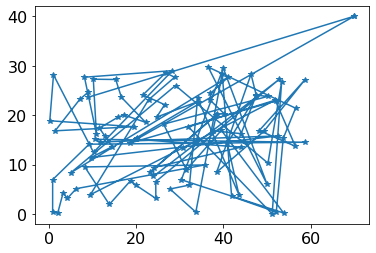

所求的巡航路径长度为： 168245.39357571004


In [14]:
import numpy as np
from numpy.random import randint, rand, shuffle
from matplotlib.pyplot import plot, show, rc

a = np.loadtxt("Pdata17_2.txt")

xy, d = a[:, :2], a[:, 2:]
N = len(xy)
#w为种群的个数
w = 50
#g为进化的代数
g = 10
J = []

for i in np.arange(w):
    c = np.arange(1, N-1)
    shuffle(c)
    c1 = np.r_[0, c, 101]
    flag = 1
    while flag > 0:
        flag = 0
        for m in np.arange(1, N - 3):
            for n in np.arange(m + 1, N - 2):
                if d[c1[m], c1[n]] + d[c1[m+1], c1[n+1]] < d[c1[m], c1[m+1]] + d[c1[n], c1[n+1]]:
                    c1[m+1:n+1] = c1[n:m:-1]
                    flag = 1
    c1[c1] = np.arange(N)
    J.append(c1)
J = np.array(J) / (N-1)

for k in np.arange(g):
    A = J.copy()
    c1 = np.arange(w)
    #交叉操作的染色体配对组
    shuffle(c1)
    #交叉点的数据
    c2 = randint(2, 100, w)
    for i in np.arange(0, w, 2):
        #保存中介变量
        temp = A[c1[i], c2[i]:N-1]
        A[c1[i], c2[i]:N-1] = A[c1[i+1],c2[i]:N-1]
        A[c1[i+1],c2[i]:N-1]=temp
    B = A.copy()
    #初始化变异染色体的序号
    by = []
    while len(by) < 1:
        by = np.where(rand(w) < 0.1)
    print(by)
    by = by[0]
    B = B[by,:]
    G = np.r_[J,A,B]
    #把染色体翻译成0,1,...,101
    ind = np.argsort(G, axis=1)
    NN = G.shape[0]
    L = np.zeros(NN)
    for j in np.arange(NN):
        for i in np.arange(101):
            L[j] = L[j] + d[ind[j,i],ind[j,i+1]]
    ind2 = np.argsort(L)
    J = G[ind2,:]
path = ind[ind2[0],:]
zL = L[ind2[0]]
xx = xy[path,0]
yy = xy[path, 1]
rc('font', size=16)
plot(xx,yy,'-*')
show()
print('所求的巡航路径长度为：', zL)
            